# COGS 118A - Project Checkpoint - Used Car Valuation Tool

# Names

- Zhuotong Xie (Tom)
- Jiawen Wang (Coco)
- Sally Yu
- Gaoying Wang


# Abstract 
Our project is aiming to give Audi owners a reasonable prediction about the selling price of their Audi cars. It could also be helpful for Audi lovers who have specific requirements for a used Audi car. We use the UK Used Car Dataset from kaggle and we focus on only Audi made. There are many features like mileage , year of registration and model. Most importantly, there is a price column in the dataset for us to split the training and testing. All the data variables are measured by the official British market, and all legal cars in the market would have the precize record for their features. Our project would mainly rely on polynomial regression to discover the complicated relationship between other features and prices. In addition, for certain features like model of car, we would use one-hot encoding to make categorical features normalized. Lastly, to check the prediction accuracy of our project, we made an evaluation metric which allows the MSE between prediction and actual price to be less than 200^2.  For the overall performance, we built another metric to set our goal of the correct rate being 75%(prediction within actual +/-200).

# Background

Car valuation websites have been around for several decades, and have evolved and improved significantly over time. The first car valuation guides were published in book form, and were typically used by car dealerships and other professionals in the automotive industry. An example is The Kelley Blue Book, which was first published in 1926 as a guide for car dealers to determine the value of trade-ins.


In the early days, when selling a used car to a dealership, “automotive industry professionals check the vehicle’s history report and make an unscientific, educated guess as to its impact on the vehicle’s value.”<a name="blackbook"></a>[<sup>[1]</sup>](#blackbook). This valuation process is subjective and problematic, and often leads to inaccurate estimations. As a solution, online car valuation sites began to emerge towards the late 90s. These tools typically required users to input basic information about a car, such as its make, model, year, and mileage, to generate an estimated value. These early online valuation tools were relatively simple and could only provide a rough estimate of the value of cars. 


As the Internet became more widespread and technology began to develop, the number of online car valuation tools grew markedly. In today’s world, there are numerous websites and apps that offer free and easily-accessible car valuation services, such as Kelley Blue Book, Cargurus, Edmunds, and Carfax, just to name a few. These tools have grown to be more elaborate and complex over time, utilizing machine learning algorithms and other techniques to produce more accurate estimates of a car's value <a name="Bukvić"></a>[<sup>[3]</sup>](#Bukvić).


Nowadays, car valuation websites have become an essential resource for people looking to buy or sell a used car. They provide potential buyers and sellers a good estimate of the value of a particular type of car, which can be useful in negotiating with dealerships or private sellers, and ensure them that they are getting a fair price. 
In recent years especially, used cars sales are on the rise on a global scale due to the increased price of new cars. There is a growing need for used car price prediction system that can effectively determine the worthiness of the car using a variety of features <a name="Gokce"></a>[<sup>[2]</sup>](#Gokce). 


Even with continued advances, there are still issues with these valuation tools, namely the lack of transparency <a name="Daneshjou"></a>[<sup>[4]</sup>](#Daneshjou) and limitation in data on certain models and makes of cars. In this project, we hope to build a model that can not only accurately predict the value of used Audi cars, but also provide a outline of how the algorithm arrives at its estimates so that users are able to understand the whole process. In addition, we decided to focus on Audi cars only so that we can explore the potential of particular features or built of Audi cars that may allow us to further optimize the accuracy of our predictions. 




# Problem Statement

The main issues with car valuation tools that we want to address in this project are the lack of transparency in algorithms and the limitation in the type of data used to make price predictions. Many of the car valuation sites and apps provide an easy way for people to input a few basic information about a certain car, such as the model, make, and year, and instantly give out a value estimate. Although it is very convenient, these tools don’t provide users with an explanation of how the algorithm arrives at its estimate nor how accurate the estimation is likely. Furthermore, using only a few basic features, these algorithms are unlikely to capture the whole picture of each car in order to make high-accuracy predictions.

# Data

#### UK Used Cars Dataset:
https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes <br>
(10668 observations and 9 variables) 


The dataset we downloaded contains several used car data in the UK in the past decade. There are different car makes in the dataset but we are mainly focusing on the Audi cars since we want to build a precise predictive model for the sellers and buyers that are interested in Audi used cars.


The dataset contains 10668 observations and 9 variables, the 9 variables are model, year, price, transmission, mileage, fuel type, tax, mpg, and engine size, for the future machine learning processes, we will discard the tax since it is not helpful when predicting a used car’s value. 
We will use more datasets about Audi cars if we can find any that can improve our prediction.


In [4]:
import pandas as pd
audi = pd.read_csv('audi.csv')
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats #import packages

From the background research, we found that there is a road tax in the UK. This feature is very
 flexible, and it has a trivial relationship with the price of used cars in the whole market. Thus, we
 decided to get rid of the column tax to make our features more relevant to the used car price.

In [6]:
audi = audi.drop(columns = ['tax'])
audi = audi.loc[audi['model'] != 'A2']
audi = audi.loc[audi['model'] != 'RS7']
audi.head()


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


We can use graphs to show the possible relationships between numerical features and price. For example, normal distribution curves can be used to see the possible relationship between mileage and price.

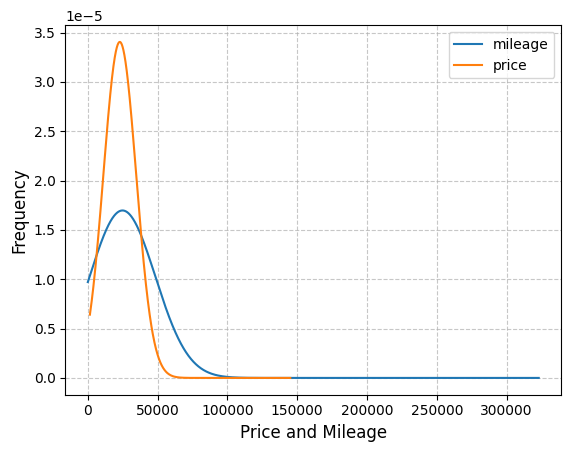

In [4]:
df_mean_p = np.mean(audi['price'])
df_std_p = np.std(audi['price'])
df_mean_m = np.mean(audi['mileage'])
df_std_m = np.std(audi['mileage'])
 
# Calculating probability density function (PDF)
pdf_m = stats.norm.pdf(audi['mileage'].sort_values(), df_mean_m, df_std_m)
pdf_p = stats.norm.pdf(audi['price'].sort_values(), df_mean_p, df_std_p)

# Drawing a graph
plt.plot(audi['mileage'].sort_values(), pdf_m, label = 'mileage') 
plt.plot(audi['price'].sort_values(), pdf_p, label = 'price') 
plt.legend()
plt.xlabel("Price and Mileage", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.7, linestyle="--")
plt.show()

Plots for categorical features:

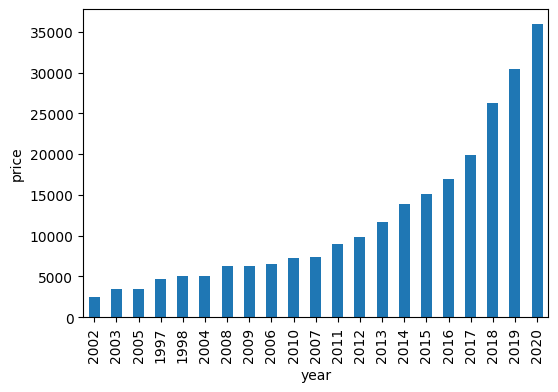

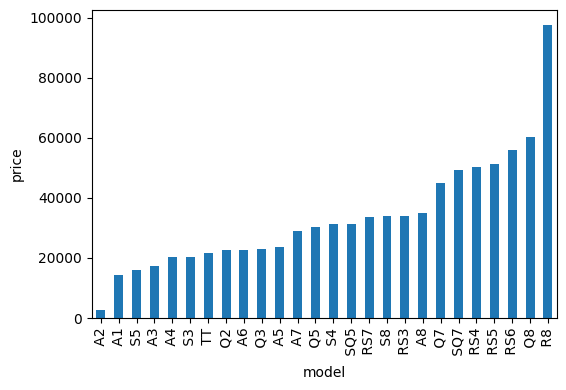

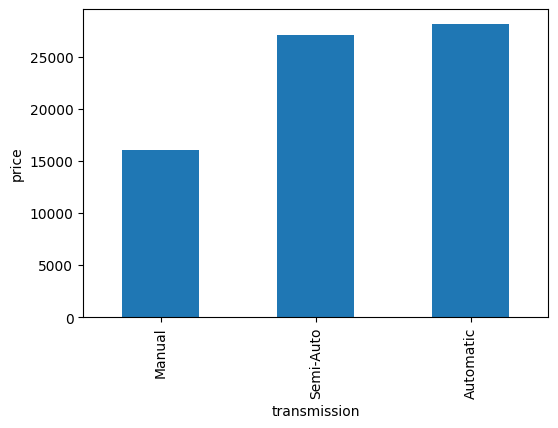

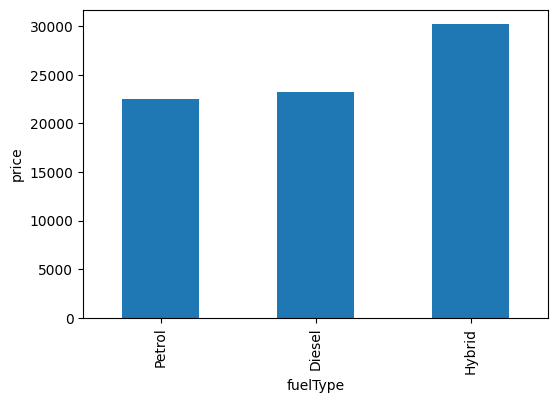

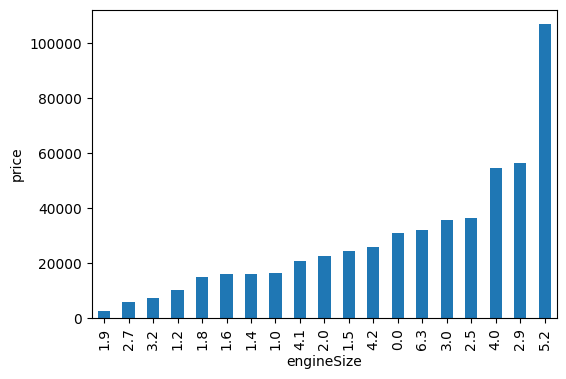

In [5]:
for col in ['year', 'model', 'transmission', 'fuelType', 'engineSize']:
    plt.figure(figsize=(6, 4))
    audi.groupby(col)['price'].mean().sort_values().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('price')

Plots for numerical features:

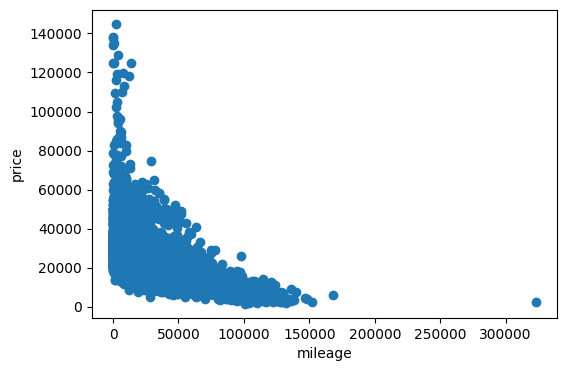

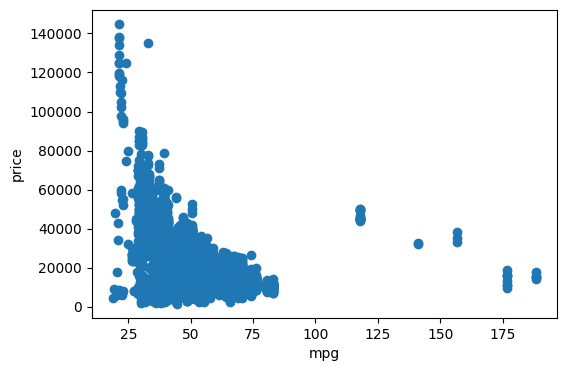

In [6]:
for col in ['mileage', 'mpg']:
    plt.figure(figsize=(6, 4))
    plt.scatter(audi[col], audi['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

<AxesSubplot: xlabel='model', ylabel='price'>

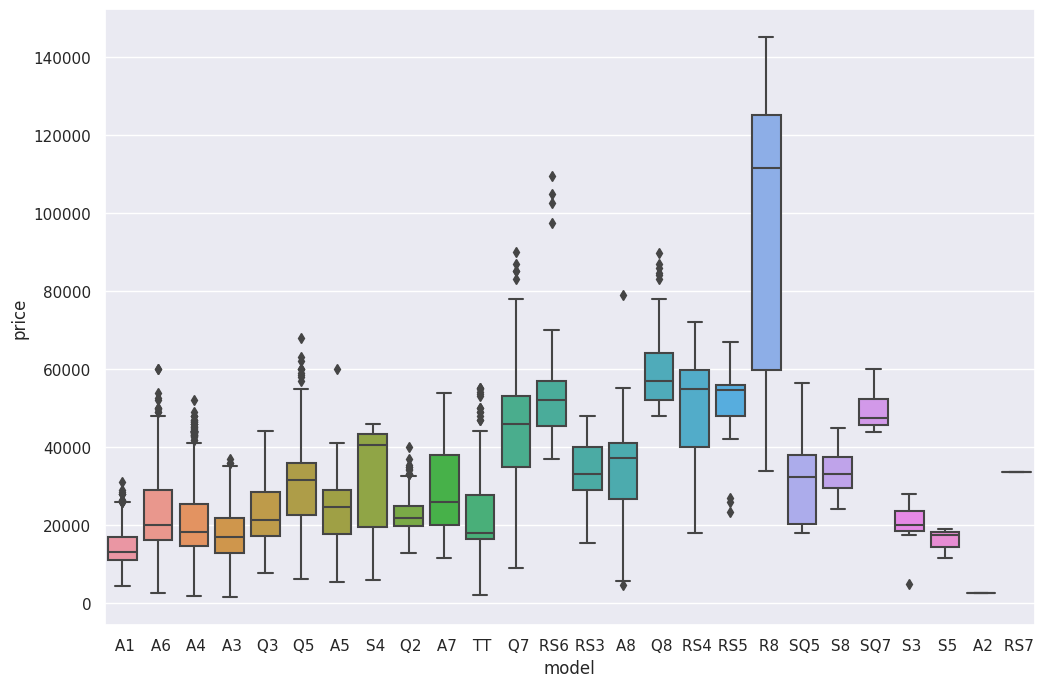

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data = audi, x = 'model', y = 'price')

In [7]:
#For categorical data like model and fuel type, we want to one-hot encoding these features.
onehot_model = pd.get_dummies(audi['model'])
onehot_transmission = pd.get_dummies(audi['transmission'])
onehot_fuelType = pd.get_dummies(audi['fuelType'])
onehot_audi = onehot_model.join(onehot_transmission)
onehot_audi = onehot_audi.join(onehot_fuelType)
new_audi = onehot_audi.join(audi['year'])
new_audi = new_audi.join(audi['mileage'])
new_audi = new_audi.join(audi['mpg'])
new_audi = new_audi.join(audi['engineSize'])
X = np.array(new_audi)
y = np.array(audi['price'])
y.shape

(10668,)

In [8]:
print('Number of features: ', len(X[0]))

Number of features:  36


# Proposed Solution

Based on real data collected from the used car market, we will balance several factors and provide a reasonable estimation of car price. Cars can have a wide range of unique features, in the dataset we are using, there are currently 7 factors that may affect car price. If possible, we will try to find more specific data about Audi cars, which may help increase the accuracy of our model in predicting car prices.

For the benchmark model, we will be using simple linear regression. Since we assume most features are linearly correlated with price, linear regression as a baseline model should be able to achieve reasonable performance but not the best. In the data exploration step, we will be plotting individual features with price to analyze the shape of the underlying relationships, which will help us determine which model would be more appropriate to use. For example, if the relationship between the model of a car and its price is not linear, but instead has a parabolic or cubic shape, then polynomial regression can capture this non-linear relationship. 

In order to capture these more complex relationships between the features and price, we will be testing 4 other models, which are ridge regression, lasso regression, random forest, and gradient boosting regressor. In the end, we will also try stacking to see if a combination of several models could achieve a higher performance. For each model, we will select the hyperparameters carefully through gridsearch and make sure that the model is not overfitting using cross-validation techniques. Lastly, since our goal is to reduce the information asymmetry among buyers and sellers, we will provide a detailed explanation of the algorithms, making buyers aware of how the prediction was made. 

# Evaluation Metrics


- We will be using MSE as one of the evaluation metrics. The reason why we come up with the idea of MSE is that we do not want the absolute difference between our predicted car price and the actual car price to be more than 200 euros. So, if the final MSE of the model is smaller than 200^2  = 40000, then the model reaches our satisfaction.


- We also developed our own metric for this model. Since we do not want the absolute difference between the predicted car price and the actual car price to be more than 200, we can first calculate the absolute price difference and see what percentage of the results satisfy our requirement. If we have a final value of 75%,  then we conclude the model reaches our expectations.


# Preliminary results

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Benchmark Model: Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
train_e = mean_squared_error(y_train, y_pred_train)
test_e = mean_squared_error(y_test, y_pred_test)
print('Training error: ', train_e)
print('Testing error: ', test_e)

Training error:  16580769.834434798
Testing error:  1.3250576334113597e+20


Our benchmark model built with linear regression has a very poor performance both on the train and the test sets, which implies that many features are not linearly correlated with price, and linear regression is not able to capture some of the true underlying relationships. This means that more complex models might be able to achieve better performance.

### Lasso Regression

In [12]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.2, warm_start=True, max_iter=2000)
lasso.fit(X_train, y_train)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
train_e = mean_squared_error(y_train, y_pred_train)
test_e = mean_squared_error(y_test, y_pred_test)
print('Training error: ', train_e)
print('Testing error: ', test_e)

Training error:  16581790.769906051
Testing error:  16810057.018396854
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.292e+09, tolerance: 1.076e+08
  model = cd_fast.enet_coordinate_descent(


We notice that the training error and testing error are all extremely high with the default hyperparameters.

To find better hyperparameters, we can use the Gridsearchcv from Scikit-Learn. The hyperparameters we'd like to find are alpha and max_iter. The alpha hyperparameter controls the strength of this penalty term. Higher values of alpha result in stronger regularization and more aggressive shrinking of the coefficients, which can lead to a simpler and more interpretable model but may also result in higher bias. Lower values of alpha result in weaker regularization and less shrinking of the coefficients, which can lead to a more complex model that may overfit the training data but may also result in lower bias. The max_iter hyperparameter sets the maximum number of iterations that the optimization algorithm will run for. If the algorithm does not converge within max_iter iterations, it will stop and return the current estimate of the coefficients, even if it has not reached a true minimum of the loss function.

In [13]:
'''
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'max_iter': [1000, 5000, 10000]
}

# Define Lasso model
lasso = Lasso()

# Perform grid search
grid_search_lasso = GridSearchCV(lasso, param_grid=param_grid, cv=5)
grid_search_lasso.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search_lasso.best_params_)
print("Best score: ", grid_search_lasso.best_score_)

#Best hyperparameters:  {'alpha': 1.0, 'max_iter': 5000}
#Best score:  0.8734720527678654
'''

'\nfrom sklearn.linear_model import Lasso\nfrom sklearn.model_selection import GridSearchCV\nparam_grid = {\n    \'alpha\': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],\n    \'max_iter\': [1000, 5000, 10000]\n}\n\n# Define Lasso model\nlasso = Lasso()\n\n# Perform grid search\ngrid_search_lasso = GridSearchCV(lasso, param_grid=param_grid, cv=5)\ngrid_search_lasso.fit(X_train, y_train)\n\n# Print best hyperparameters and corresponding score\nprint("Best hyperparameters: ", grid_search_lasso.best_params_)\nprint("Best score: ", grid_search_lasso.best_score_)\n\n#Best hyperparameters:  {\'alpha\': 1.0, \'max_iter\': 5000}\n#Best score:  0.8734720527678654\n'

From the Gridsearch, we have the best combinations of alpha = 1 and max_iter = 5000, let's plug them into the final model for prediction.

**Improved Lasso Regression**

In [14]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0, max_iter = 5000)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
print('Testing error: ',MSE)

16849365.54805841


Compared to our goal of an MSE that is less than 40000, the MSE result we got from the improved lasso model is far away from our expectations. So Lasso regression might not be a good choice for the prediction model.

### Ridge Regression

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
train_e = mean_squared_error(y_train, y_pred_train)
test_e = mean_squared_error(y_test, y_pred_test)
print('Training error: ', train_e)
print('Testing error: ', test_e)

Training error:  16612851.648521783
Testing error:  16871047.550878268


The training error and testing error of the default ridge regression are similar to those of the default lasso regression.

We decide to do the same hyperparameter search for the ridge regression. The hyperparameters we intend to find are also alpha and max_iter.

In [16]:
'''
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Define hyperparameters to tune over
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'max_iter': [1000, 5000, 10000]
}

# Define Ridge model
ridge = Ridge()

# Perform grid search
grid_search = GridSearchCV(ridge, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print best hyperparameters and corresponding score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
Best hyperparameters: {'alpha': 0.5, 'max_iter': 1000}
Best score: 0.858506481545551
'''

'\nfrom sklearn.linear_model import Ridge\nfrom sklearn.model_selection import GridSearchCV\n# Define hyperparameters to tune over\nparam_grid = {\n    \'alpha\': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],\n    \'max_iter\': [1000, 5000, 10000]\n}\n\n# Define Ridge model\nridge = Ridge()\n\n# Perform grid search\ngrid_search = GridSearchCV(ridge, param_grid=param_grid, cv=5)\ngrid_search.fit(X, y)\n\n# Print best hyperparameters and corresponding score\nprint(f"Best hyperparameters: {grid_search.best_params_}")\nprint(f"Best score: {grid_search.best_score_}")\nBest hyperparameters: {\'alpha\': 0.5, \'max_iter\': 1000}\nBest score: 0.858506481545551\n'

The result we got from the Gridsearch is the combination of alpha = 0.5 and max_iter = 1000 which is different from that of Lasso Regression. Let's see if that is going to make Ridge Regression better than Lasso Regression or not.

**Improved Ridge Regression**

In [17]:
ridge = Ridge(alpha = 0.5, max_iter = 1000)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
print('Testing error: ',MSE)

16829772.06465514


Sadly, the Ridge Regression is only making a small progress.

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
train_e = mean_squared_error(y_train, y_pred_train)
test_e = mean_squared_error(y_test, y_pred_test)
print('Training error: ', train_e)
print('Testing error: ', test_e)

Training error:  826193.0070226366
Testing error:  5616392.880981199


Using Random Rorest with default hyperparameter values, both the training and testing error decreased significantly. 

Let's run a grid search on our Random Forest Regressor to find the best combination of hyperparameter values to optimize our model.

In [19]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedKFold

# param_grid = [{'n_estimators': [100, 200, 300],
#                'min_samples_split': [2, 5, 10],
#                'min_samples_leaf': [1, 2, 4],
#                'max_depth': [5, 10, 20],
#               }]
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=10)
# grid_search.fit(X, y)

# print('Best hyperparameters:', grid_search.best_params_)
# print('Best score:', grid_search.best_score_)

# Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
# Best cross-validation score: -6618947.124935618

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: -6618947.124935618

Plotting the train and test accuracy curves.

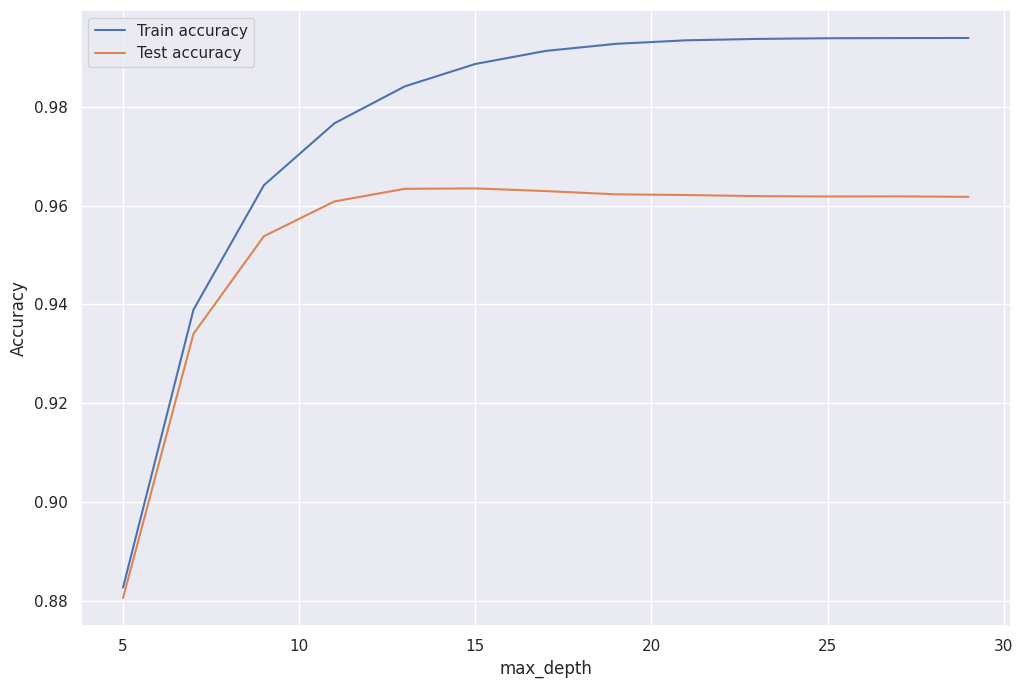

In [20]:
train_errors = []
test_errors = []
max_depth_range = range(5, 30, 2)
for depth in max_depth_range:

    rf = RandomForestRegressor(max_depth=depth, min_samples_leaf=1, min_samples_split=2, n_estimators=300,
    random_state=42)
    rf.fit(X_train, y_train)
    train_errors.append(rf.score(X_train, y_train))
    test_errors.append(rf.score(X_test, y_test))

# Plot the errors as a function of max_depth
plt.plot(max_depth_range, train_errors, label='Train accuracy')
plt.plot(max_depth_range, test_errors, label='Test accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Improved Random Forest Regressor:

In [21]:
rf = RandomForestRegressor(max_depth=13, min_samples_leaf=1, min_samples_split=2, n_estimators=300,
random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_error = mean_squared_error(y_test, y_pred)
print('Testing error: ', rf_error)

Testing error:  5326670.797744919


Although the test error of our Random Forest Regressor did improve, it is far from our initial goal, which meant that we might need to spend more time on preprocessing.

### Gradient Boosting Regression

Let's first take a look at how the Gradient Boosting Regression performs.

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)
train_e = mean_squared_error(y_train, y_pred_train)
test_e = mean_squared_error(y_test, y_pred_test)
print('Training error: ', train_e)
print('Testing error: ', test_e)

Training error:  6854060.382106577
Testing error:  7749231.7265657615


**The hyperparameters we want to find are:**

'learning_rate': This hyperparameter controls the step size at each iteration of the boosting process. A smaller learning rate usually leads to better results but requires more iterations.

'n_estimators': This hyperparameter controls the number of boosting stages to perform. A higher number of estimators may lead to better results, but also increases the risk of overfitting.

'max_depth': This hyperparameter controls the maximum depth of each tree in the boosting process. A deeper tree can model more complex relationships in the data, but also increases the risk of overfitting.

'min_samples_split': This hyperparameter controls the minimum number of samples required to split an internal node in each tree. A higher value can prevent overfitting, but may also lead to underfitting.

'min_samples_lead': This hyperparameter controls the minimum number of samples required to be at a leaf node. A higher value can prevent overfitting, but may also lead to underfitting.

In [24]:
'''
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define Gradient Boosting Regressor model
gb = GradientBoostingRegressor()

# Perform grid search
grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print best hyperparameters and corresponding score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000}
Best score: 0.9557639436928819
'''

'\nfrom sklearn.ensemble import GradientBoostingRegressor\nfrom sklearn.model_selection import GridSearchCV\nparam_grid = {\n    \'learning_rate\': [0.1, 0.05, 0.01],\n    \'n_estimators\': [100, 500, 1000],\n    \'max_depth\': [3, 5, 7],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# Define Gradient Boosting Regressor model\ngb = GradientBoostingRegressor()\n\n# Perform grid search\ngrid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)\ngrid_search.fit(X, y)\n\n# Print best hyperparameters and corresponding score\nprint(f"Best hyperparameters: {grid_search.best_params_}")\nprint(f"Best score: {grid_search.best_score_}")\nBest hyperparameters: {\'learning_rate\': 0.1, \'max_depth\': 3, \'min_samples_leaf\': 2, \'min_samples_split\': 5, \'n_estimators\': 1000}\nBest score: 0.9557639436928819\n'

**Improved Gradient Boosting Regression**

In [25]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 1000)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
print('Testing error: ',MSE)

Testing error:  5536510.84849642


Unfortunately, the result we got from gradient boosting regression is not satisfying. The MSE of 5536510 is far beyond our standard of 40000.

### Next Steps:

Since none of the proposed models achieved high enough accuracy, we will go back to data preprocessing and use PCA to hopefully filter out the nonimportant features to see if it will improve model performance. Linear regression is clearly shown to not be a good fit for the dataset, so we will focus on the other models in the next stage. In addition, we will also try stacking of several different models. 

# Ethics & Privacy

There are no buyer’s name or seller’s name or car VIN number recorded in this dataset, so we are not worried about putting the car owner’s information at risk. We downloaded this dataset from Kaggle, and the owner of this dataset announced that this dataset is open to the public and there’s no copyright. The unintended consequence of the model we built is it might disturb the used car market, if there is an ongoing event that decreases all used car’s values and we still predict the car price as high as before, the buyer still lists a high car price according to our mode, he/she will fail to sell the car. To address this issue, we will inform our users that the predicted car value is only for reference, the actual car price might fluctuate according to the changes. 

# Team Expectations 

- Communication within our group should always be in time and efficient, and we would use hybrid form to make sure the efficiency of our discussion(online like zoom meeting, in-person meeting in study room)


- For different decision making in our project, if there are some different perspectives and suggestions from group members, we should have a nice and positive discussion no matter online or in-person. The final decision should be voted by other members to decide the better direction for the project.


- It is also important to make sure the workload for every member is almost equal, but flexibility is needed with changing situations. For example, some members might be good at some imperative parts of the project, which other members are not familiar with. Other members should also help with experts in those parts.


- Not only making a project would yield a high score is important, helping each other to improve skills like coding during the process is also one of our ultimate goals.


- Every member should try his/her best to fulfill their responsibilities. If something out of control happens, group members should help each other out instead of blaming each other. It is also another aspect of flexibility.


- Be nice, and be patient!!!


- With great power comes great responsibility


# Project Timeline Proposal

#### 1. Project planning and scoping (1 week: 02-22-2023)

Discuss and define research questions
Develop methodology and approach
Create project plan and timeline
Identify data sources

#### 2. Data cleaning, further data collection and rough data analysis, rough model training (2 weeks: 03-08-2023)

Filter data
Rough analyze data collected from market reports, government publications, and other relevant sources 
Collect more datasets if needed
Analyze findings from data collection
Finalize an analytical tool and evaluation metrics
Use algorithm to identify trends and patterns in the data
Repeatedly train model on different data points

#### 3. Further model training (1 week:  03-16-2023)
       
Use algorithm to identify trends and patterns in the data
Repeatedly train model on different data points
Evaluate the model and make changes until it provides an relatively accurate prediction

#### 4. Synthesis, report writing(3 days:  03-19-2023)

Develop insights and conclusions based on the research questions
Write a comprehensive research report, including an executive summary, research methodology, findings, and recommendations
Collect feedback and address any questions or concerns that arise

#### 5. Finalize proposal and share (2 days: 03-21-2023)

Modify and add details to proposal based on feedbacks



# Footnotes

<a name="blackbook"></a>1.[^](#blackbook): Black Book. “Black Book Unveils History-Adjusted Vehicle Values for Auto Professionals.” Black Book, 22 Apr. 2020, https://www.blackbook.com/black-book-unveils-history-adjusted-vehicle-values-for-auto-professionals/. <br> 
<a name="Gokce"></a>2.[^](#Gokce): Gokce, Enes. “Predicting Used Car Prices with Machine Learning Techniques.” Medium, Towards Data Science, 10 Jan. 2020, https://towardsdatascience.com/predicting-used-car-prices-with-machine-learning-techniques-8a9d8313952. <br> 
<a name="Bukvić"></a>3.[^](#Bukvić): Bukvić, Lucija, Jasmina Pašagić Škrinjar, Tomislav Fratrović, and Borna Abramović. 2022. "Price Prediction and Classification of Used-Vehicles Using Supervised Machine Learning" Sustainability 14, no. 24: 17034. https://doi.org/10.3390/su142417034<br> 
<a name="Daneshjou"></a>4.[^](#Daneshjou): Daneshjou, R., Smith, M. P., Sun, M. D., Rotemberg, V., & Zou, J. (2021). Lack of Transparency and Potential Bias in Artificial Intelligence Data Sets and Algorithms: A Scoping Review. JAMA dermatology, 157(11), 1362–1369. https://doi.org/10.1001/jamadermatol.2021.3129


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5da0bb5-fd8e-4902-b34c-4c4dd0498a85' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>